<a href="https://colab.research.google.com/github/cielo112/Credit-Default-Analysis-And-Prediction/blob/main/Credit_Default_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Description

This credit default prediction project aims to develop a robust machine learning model that will enable us to predict the likelihood of credit default given the clients personal data and historical bank transactions. The project will employ several machine learning models as well as utilize Neural Networks to determine the most accurate model to perform the task. The model built in this project can be of help to financial institutions in making informed decisions regarding loan approvals, risk assessment, and/or portfolio management.

The dataset used in this project contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005

For more information on the dataset, columns, and data gathered, refer to the link attached:

[Default of Credit Card Clients Dataset](https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset)

**Table of Contents**

1. [Initial Look at the Data](#i)
2. [Data Cleaning](#dc)
3. [Feature Engineering](#fe)
4. [Train Test Split](#tts)
5. [Exploratory Data Analysis](#eda)
6. [Data Preprocessing](#dp)
7. [Model Selection](#ms)
8. [Hyperparameter Tuning](#ht)
9. [Model Deployment](#md)
10. [Further Optimzation Procedures](#fop)
11. [Neural Networks](#nn)

# Initial Look at the Data <a name='i'></a>

In [1]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r'/content/drive/MyDrive/Datasets/UCI_Credit_Card.csv')

In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
df.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1
29999,30000,50000.0,1,2,1,46,0,0,0,0,...,36535.0,32428.0,15313.0,2078.0,1800.0,1430.0,1000.0,1000.0,1000.0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

The length of the label name is very lengthy so let us first rename for the sake of brevity. Also the repayment status starts with pay_0 instead of pay_1 so we are going to rename this column as well.

In [6]:
df.rename(columns={'PAY_0': 'PAY_1',
           'default.payment.next.month': 'default'}, inplace=True)

Let us inspect some basci summary statistic for the dataset.

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_1,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


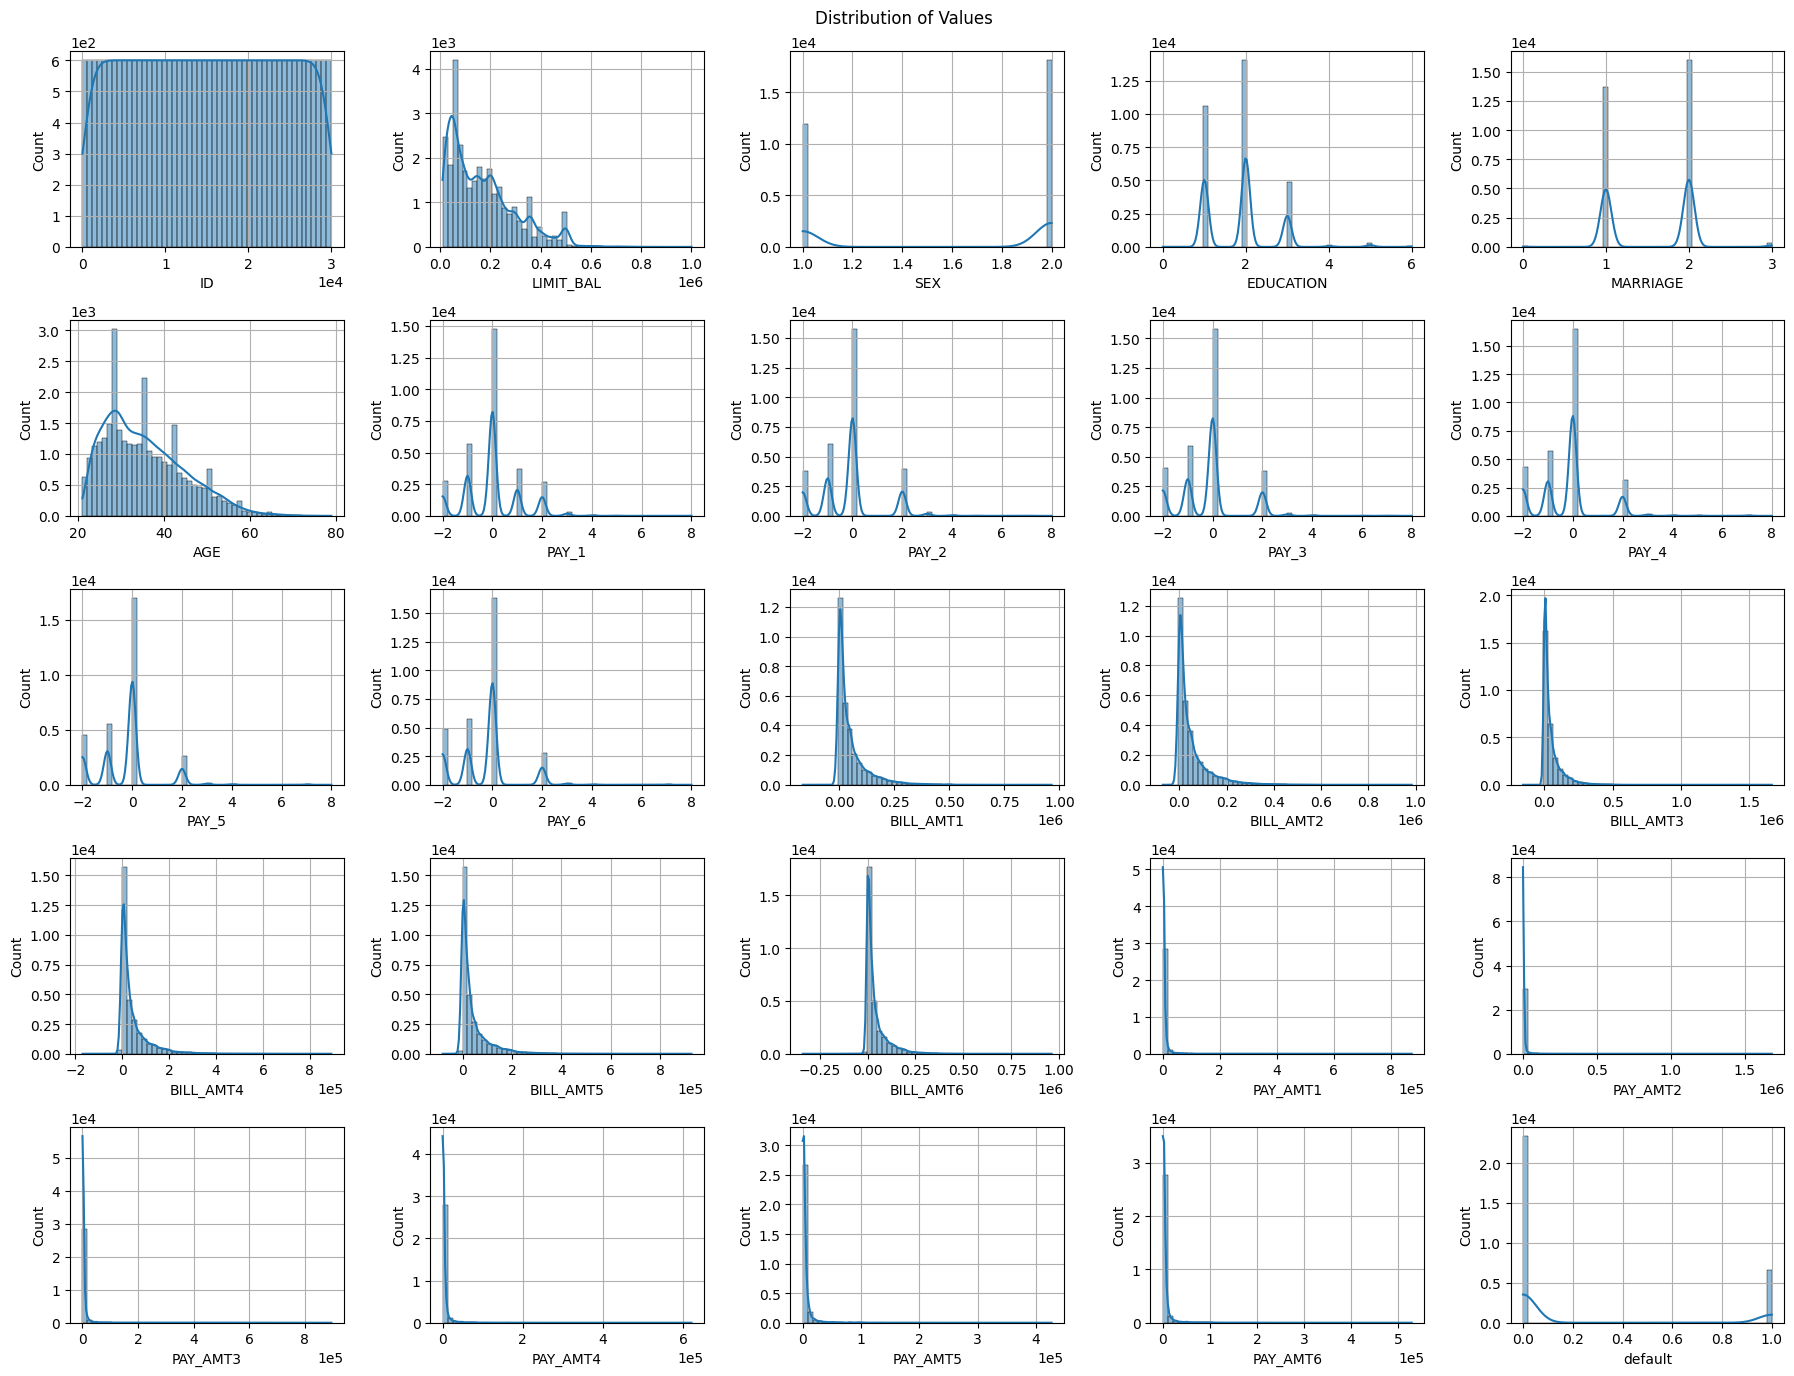

In [8]:
#make a histogram to see the values and its distribution
fig, axs = plt.subplots(figsize=(18,14), nrows=5, ncols=5)
for n, columns in zip(range(1,26),df.columns):
  plt.subplot(5,5,n)
  sns.histplot(data=df, x=columns, bins=50, kde=True)
  plt.ticklabel_format(style='sci', scilimits=(0,2))
  plt.grid(True)
plt.suptitle('Distribution of Values')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

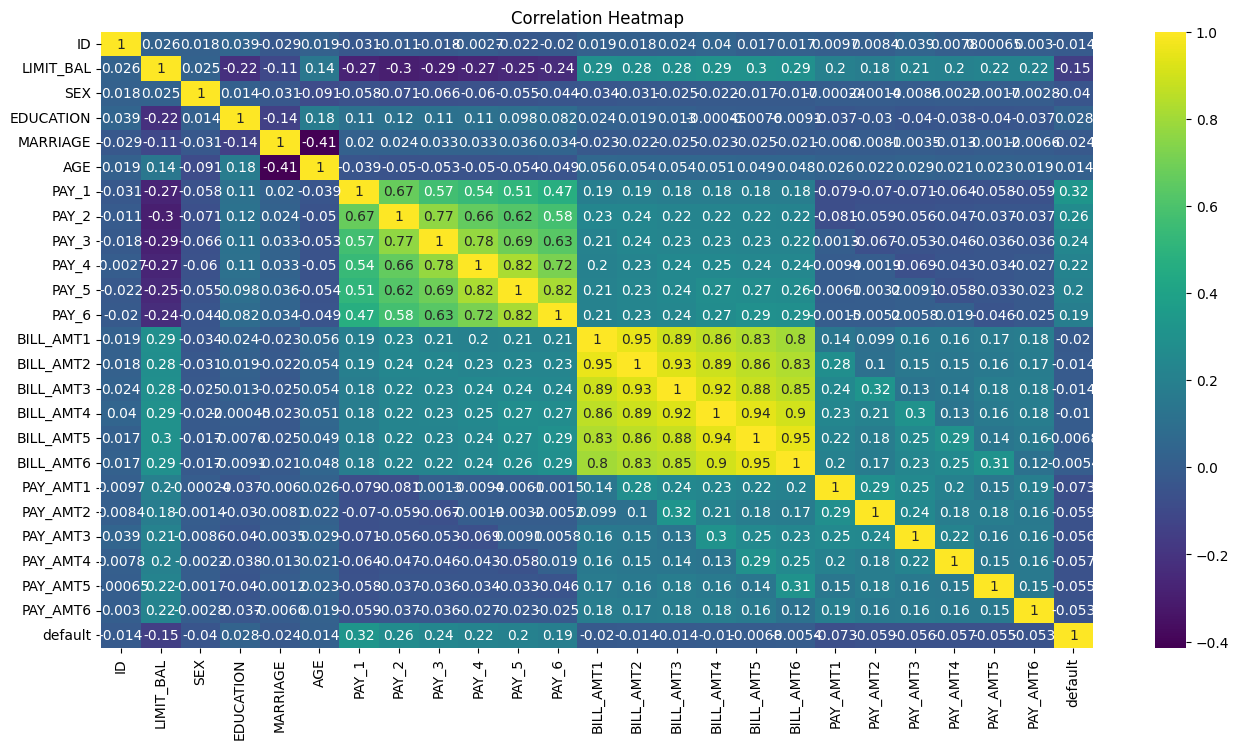

In [9]:
fig, axs = plt.subplots(figsize=(16,8))
sns.heatmap(df.corr(), cmap='viridis', annot=True)
plt.title('Correlation Heatmap')
plt.show()

**Insights from the initial look at the dataset**


- The distribution for most of the attributes are tail heavy.
- The scales of the attributes vary greatly
- The categorical attribute such as marriage, sex, education, and payment status have been assigned numerical values.
-There is imbalance in the distribution of the label. We less defaults than not defaults.

# Data Cleaning <a name='dc'></a>

In this section, we are going to focus on identifying missues values, handling mislabled columns, rectifying errors, and fixing inconsistensies in the dataset. Outliers will also be removed as early as this section as this might impact the data analysis that we are going to perform in the next section.

Let us start by checking if we have missing values and how they are distributed in our dataset using missingno.

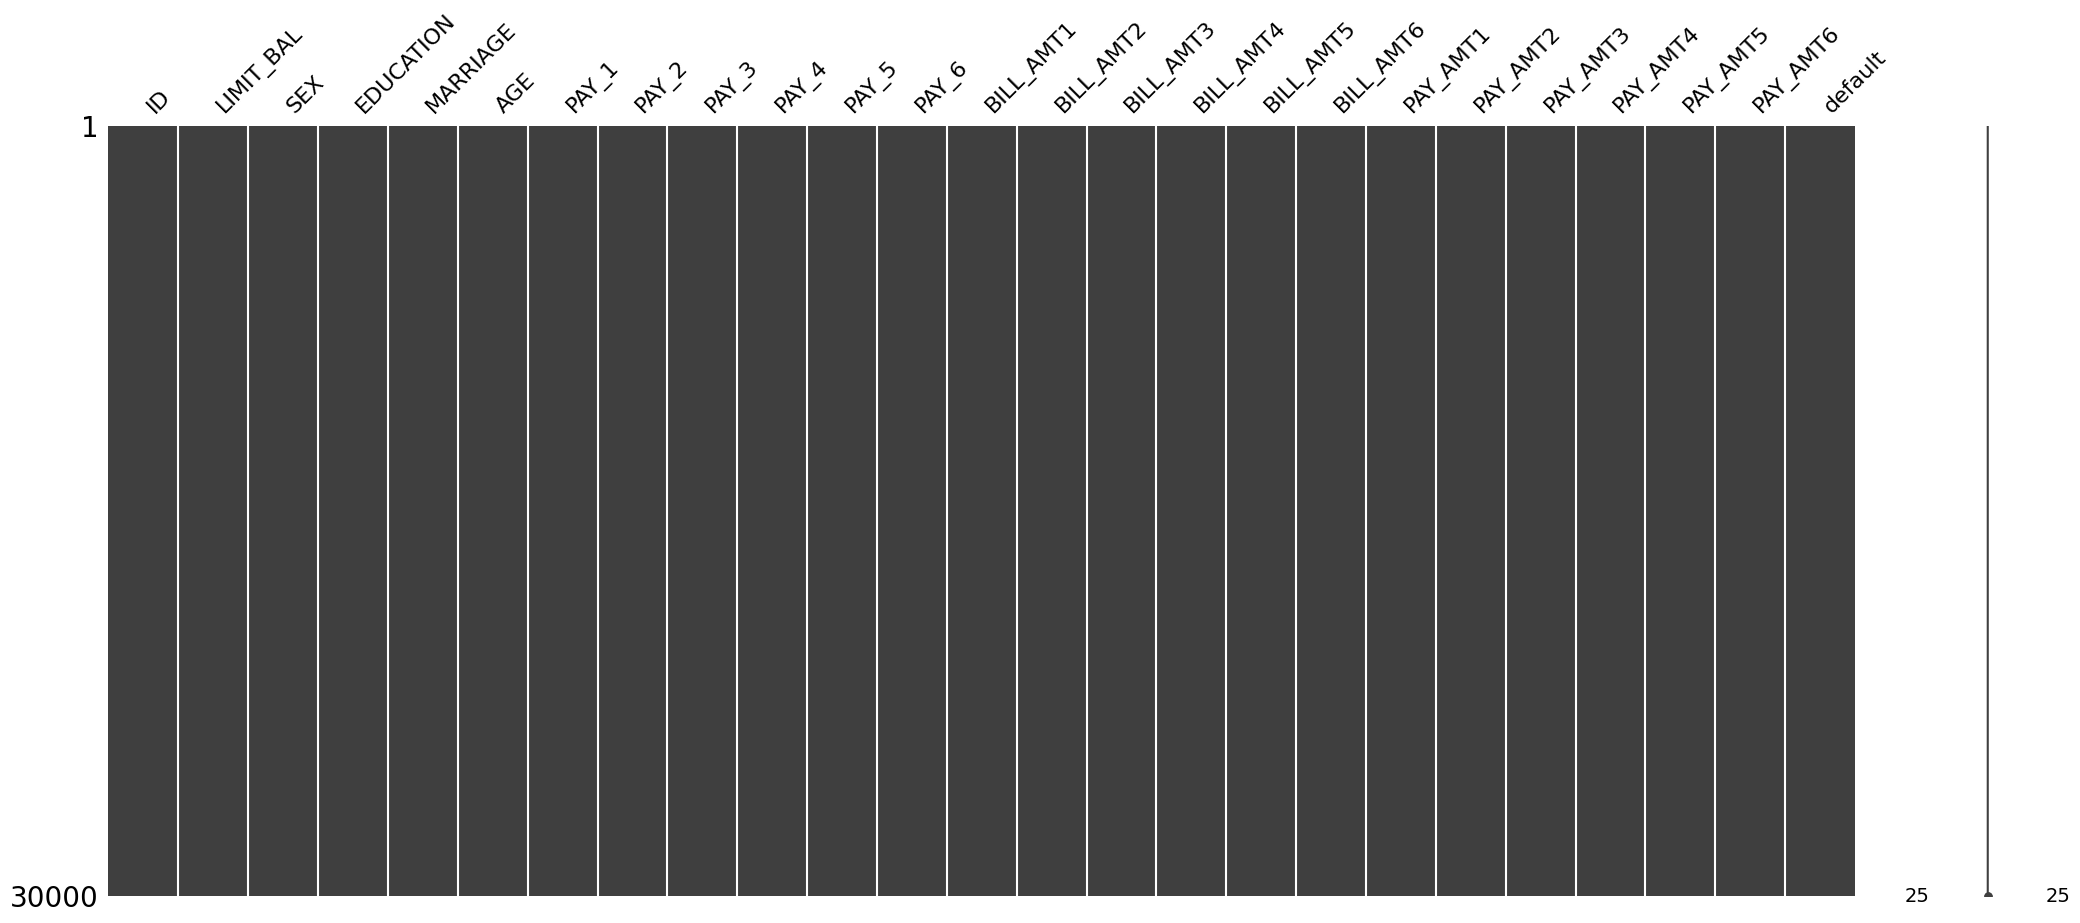

In [10]:
import missingno as msno
msno.matrix(df)
plt.show()

There are no whitespaces in our msno matrix thus no missing info is present in our dataset.

**Rectifying and Replacing Errors**

**Dropping ID Column**

The ID column just serves as a unique identifier for every instance in our dataset. It does not hold any meaningful information for our analysis so we can safely just drop the column, we have the row indexes anyway as an indetifier.

In [11]:
df.drop('ID', axis=1, inplace=True)

In [12]:
#replace the reponse 0,5,6 for the EDUCATION columns with
# 4 (others) instead since these values are unknown.

filt = (df['EDUCATION'] == 0) | (df['EDUCATION'] == 5) | (df['EDUCATION'] == 6)
df.loc[filt, 'EDUCATION'] =4

In [13]:
#replace the 0 reponse for MARRIAGE with 3 so that it belongs to the
#'others' category instead

filt = df['MARRIAGE'] == 0
df.loc[filt, 'MARRIAGE'] = 3

#replace the numerical values with their actual names

df.loc[df['MARRIAGE']==1, 'MARRIAGE']= 'Married'
df.loc[df['MARRIAGE']==2, 'MARRIAGE']= 'Single'
df.loc[df['MARRIAGE']==3, 'MARRIAGE']= 'Others'

In [14]:
#Change the gender from the numeric values to their actual names

df.loc[df['SEX']==1, 'SEX'] = 'Male'
df.loc[df['SEX']==2, 'SEX'] = 'Female'

In [15]:
#Change the EDUCATION from numeric to their actual names

df.loc[df['EDUCATION']==1, 'EDUCATION'] = 'Grad School'
df.loc[df['EDUCATION']==2, 'EDUCATION'] = 'University'
df.loc[df['EDUCATION']==3, 'EDUCATION'] = 'High School'
df.loc[df['EDUCATION']==4, 'EDUCATION'] = 'Others'

**Removing Outliers**

From our analysis we are going to remove clients who have a very high credit limit as this will skew all the other data such as payment and bills as well.

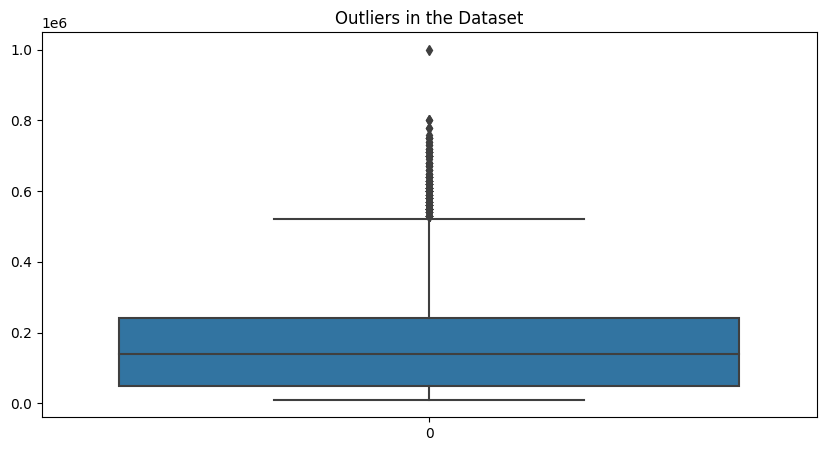

In [16]:
fig, axs = plt.subplots(figsize=(10, 5))
sns.boxplot(df['LIMIT_BAL'])
plt.title('Outliers in the Dataset')
plt.show()

In [17]:
def outlier_remover(df, col):
  #this function removes outliers based from the IQR

  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower = q1 - 1.5*iqr
  upper = q3 + 1.5*iqr

  filt = (df[col] > lower) & (df[col] < upper)
  df = df[filt]

  return df

In [18]:
df = outlier_remover(df, 'LIMIT_BAL')

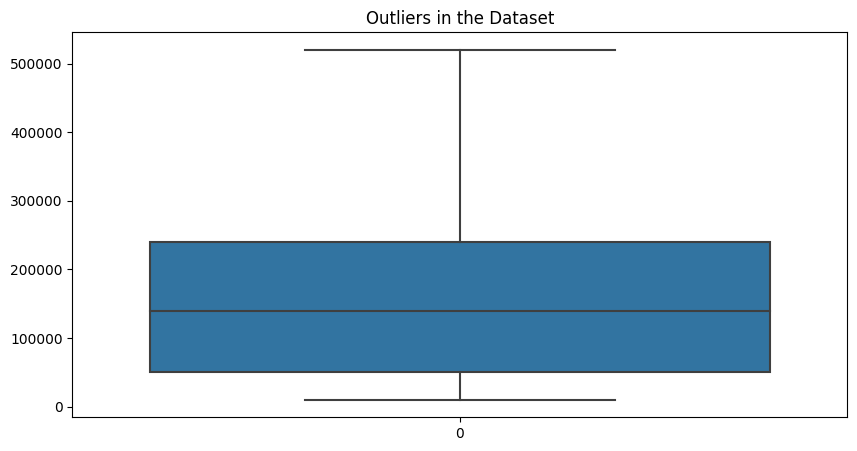

In [19]:
fig, axs = plt.subplots(figsize=(10, 5))
sns.boxplot(df['LIMIT_BAL'])
plt.title('Outliers in the Dataset')
plt.show()

#Feature Engineering <a name='fe'></a>

In this section, we will be transforming the raw data provided in the dataset into something that will give us more insight regarding the problem at hand. This process of feature engineering invovlves selecting, creating, and transforming variables to capture more relevant information patterns from the data.

Specifically we will be conducting the following operations:

1. Get arrears from the bill and payment columns
2. Get the average bill from April-September
3. Make a new column for Overlimit from the limit balance and bill



**Arrears**

As seen from the correlation table above, the bill for each month is highly correlated with each other since credit cards allow people to borrow money to purchase an item and then the amount is paid back typically in monthly installments.

But if we inspect its correlation with the label, it appears to be not indicative of whether a person has a high or low probabiliwty of being default on his/her payment. In order to get a more insightful information, we are going to replace this with the arrears instead. Arrears generally refers to any amount that is overdue after the payment due date for accounts such as loans and mortgages.

In [20]:
payments = df.loc[:, 'PAY_AMT1': 'PAY_AMT5'].columns
bills = df.loc[:, 'BILL_AMT2': 'BILL_AMT6'].columns
for bill, payment in zip(bills, payments):
  df[bill] = df[bill] - df[payment]

arrears = df.loc[:,'BILL_AMT2': 'BILL_AMT6'].mean(axis=1)
df['Arrears'] = arrears

**Overlimit**

The overlimit is when the credit card holder's purchases exceeds the limit balance of his card. The limit balance is the amount of given credit based on the clients qualification. Thus exceeding this significantly might make a client susceptible to default.

In [21]:
ave_bill = df.loc[:,'BILL_AMT1': 'BILL_AMT6'].mean(axis=1)


In [22]:
overlimit = ave_bill - df['LIMIT_BAL']
df['Overlimit'] = overlimit
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,Arrears,Overlimit
0,20000.0,Female,University,Married,24,2,2,-1,-1,-2,...,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,620.4,-18830.833333
1,120000.0,Female,University,Single,26,-1,2,0,0,0,...,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,2279.0,-117653.833333
2,90000.0,Female,University,Single,34,0,0,0,0,0,...,14549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,13279.2,-74060.833333
3,50000.0,Female,University,Married,37,0,0,0,0,0,...,28478.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,35391.2,-12675.666667
4,50000.0,Male,University,Married,57,-1,0,-1,0,0,...,18442.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,8470.4,-41505.166667


In [23]:
#Drop the bill_amt columns

df.drop(df.loc[:, 'BILL_AMT1':'BILL_AMT6'].columns, axis = 1, inplace=True)


**Engineered Dataset**

Let us now look at our engineered dataset as well as some basic summary statistic and correlations.

In [24]:
df = df[[
    'SEX', 'LIMIT_BAL', 'EDUCATION', 'MARRIAGE', 'AGE',
    'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
    'Arrears', 'Overlimit', 'PAY_1', 'PAY_2', 'PAY_3','PAY_4','PAY_5',
    'PAY_6','default'
]]

df.head()

,SEX,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Arrears,Overlimit,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default
0,Female,20000.0,University,Married,24,0.0,689.0,0.0,0.0,0.0,0.0,620.4,-18830.833333,2,2,-1,-1,-2,-2,1
1,Female,120000.0,University,Single,26,0.0,1000.0,1000.0,1000.0,0.0,2000.0,2279.0,-117653.833333,-1,2,0,0,0,2,1
2,Female,90000.0,University,Single,34,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,13279.2,-74060.833333,0,0,0,0,0,0,0
3,Female,50000.0,University,Married,37,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,35391.2,-12675.666667,0,0,0,0,0,0,0
4,Male,50000.0,University,Married,57,2000.0,36681.0,10000.0,9000.0,689.0,679.0,8470.4,-41505.166667,-1,0,-1,0,0,0,0


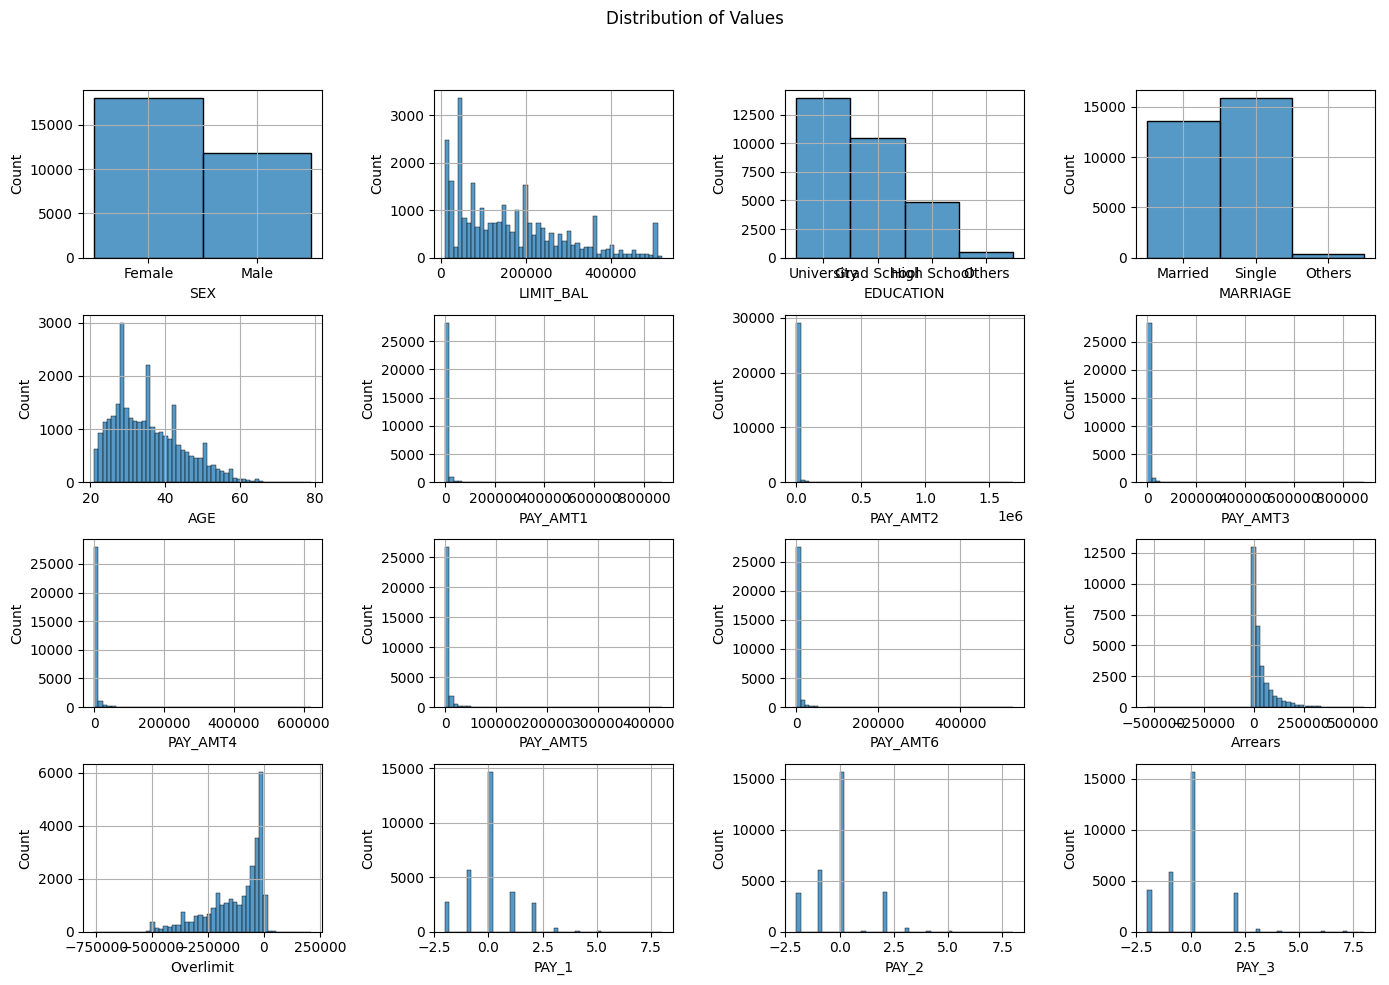

In [25]:
fig, axs = plt.subplots(figsize=(14,10), nrows= 4, ncols=4)
for i, col in zip(range(1,17), df.columns):
  plt.subplot(4,4,i)
  sns.histplot(data=df, x=col, bins=50)
  plt.grid(True)
plt.suptitle('Distribution of Values')
fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.show()

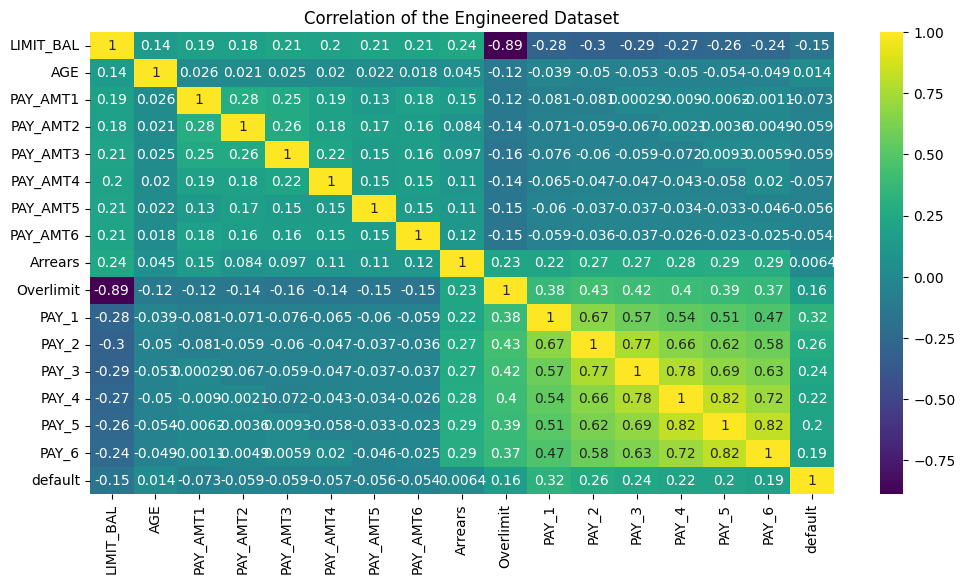

In [26]:
fig, axs = plt.subplots(figsize=(12,6))
sns.heatmap(df.select_dtypes(['float64', 'int64']).corr(), annot=True, cmap='viridis')
plt.title('Correlation of the Engineered Dataset')
plt.show()

We have now reduced the dimension of our dataset while simultaneously increasing the correlation of the features to the target label.

# Train Test Split <a mame='tts'></a>

For our model development we need to ensure that we have a separate dataset that we can use to evaluate the performance of our model to datapoints that it have not seen yet. To do this, we are going to perform a train test split using sklearns preprocessing function. This function splits our original dataset into two: a training set for model trainig and a testing set for model evaluation.

We will be performing all analysis and pre-processing in the next session using the training set that we will generate while we set aside for the mean time the testing set.

For the split that we will be doing, we are only going to set our test size to be 20% of the entire dataset. Stratification will also be done to ensure that the target label is equally distributed in the train set and test set.

In [27]:
from sklearn.model_selection import train_test_split

x = df.drop('default', axis=1)
y = df['default'].copy()

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2
                                        , stratify= y, random_state=42)


In [28]:
train_set = x_train.copy()
train_set['default'] = y_train

test_set = y_train.copy()
test_set['default'] = y_test

# Exploratory Data Analysis <a name='eda'></a>

In this section we will explore how the variables are related to each other, identify patterns, and gain insights into our dataset that would help us choose the best machine learning model to implement.

For this exploratory analysis we will be answering the following questions:

* How do factors such as age, sex, marital status, and education affect the limit balance granted to a person?
* Is arrears affected by personal factors such as age, sex, marital status, and education?
* How are personal factors such as age, sex, marital satus, and education related to the likelihood of credit default?
* How are historical bank transaction data such as payment status, pay amount, overlimit, limit balance,and arrears related to the likelihood of credit default?



**Analysis of Limit Balance**

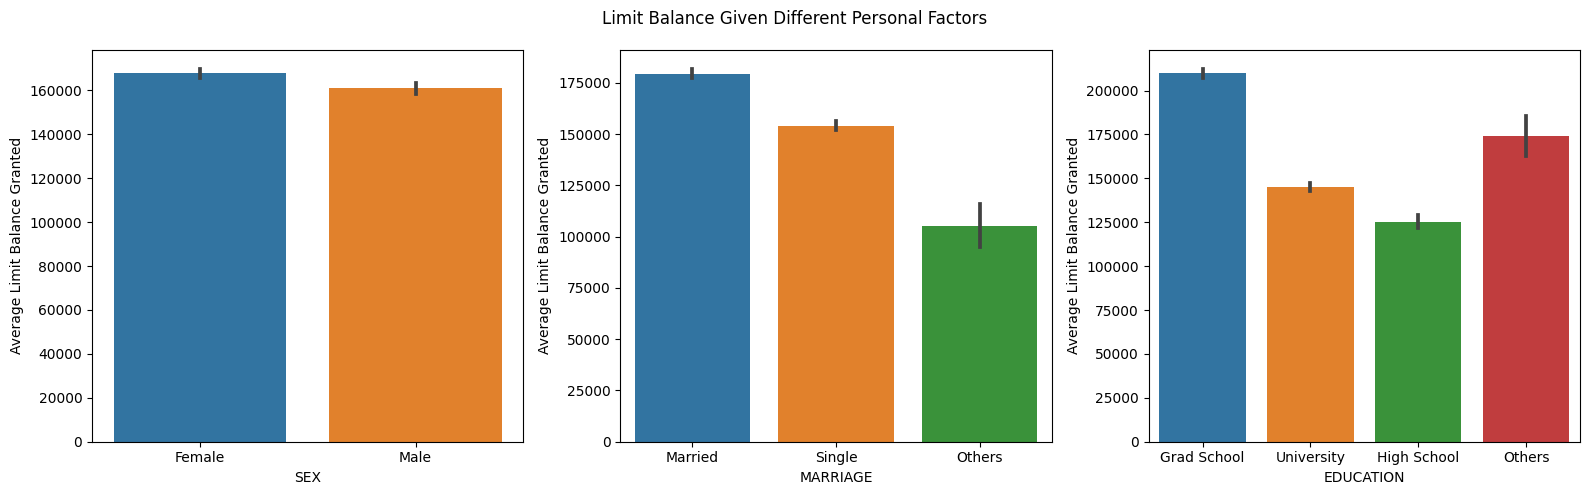

In [29]:
personal_factors = ['SEX', 'MARRIAGE', 'EDUCATION']
fig, axs = plt.subplots(figsize=(16,5), nrows=1, ncols=3)
for i, personal_factor in zip(range(1,5), personal_factors):
  plt.subplot(1,3,i)
  sns.barplot(data=train_set, x=train_set[personal_factor], y='LIMIT_BAL')
  plt.xlabel(personal_factor)
  plt.ylabel('Average Limit Balance Granted')
plt.suptitle('Limit Balance Given Different Personal Factors')
fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.show()

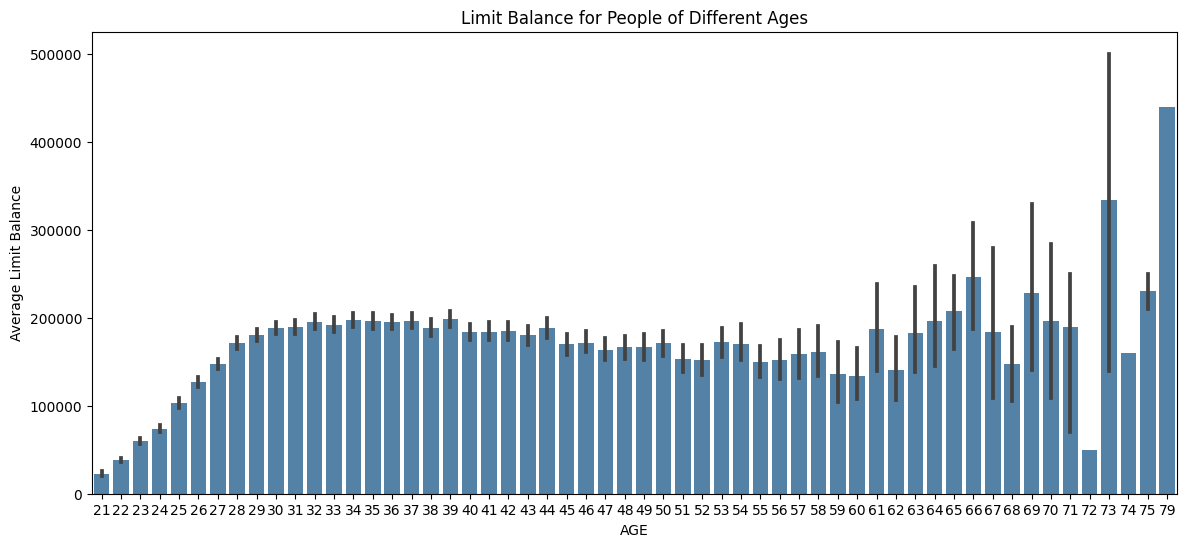

In [30]:
fig, axs = plt.subplots(figsize=(14,6))
sns.barplot(data=train_set, x='AGE', y='LIMIT_BAL', color='steelblue')
plt.ylabel('Average Limit Balance')
plt.title('Limit Balance for People of Different Ages')
plt.show()

Insights from the graphs:

* Female clients are on average given with a higher credit limit.
* Clients that are married have a greater chance of being granted a higher credit limit than clients who are single.
* On average, clients who have a graduate degree are granted the highest credit limit while high school graduates are given the least.
* The credit limit given to a person increases significantly as the persons age increases from the age of 21 to 30. The increases plateus here and declines slightly as the client's age goes past 40.
* Clients past the age of 62 receive the highest credit limit with 73 year old clients receiveing the most. The variation in the credit limit for people in this age group is very large though which indicates that several factors are considered for the credit limit. Some people are granted far less than what the average receives.



**Analysis of Arrears**

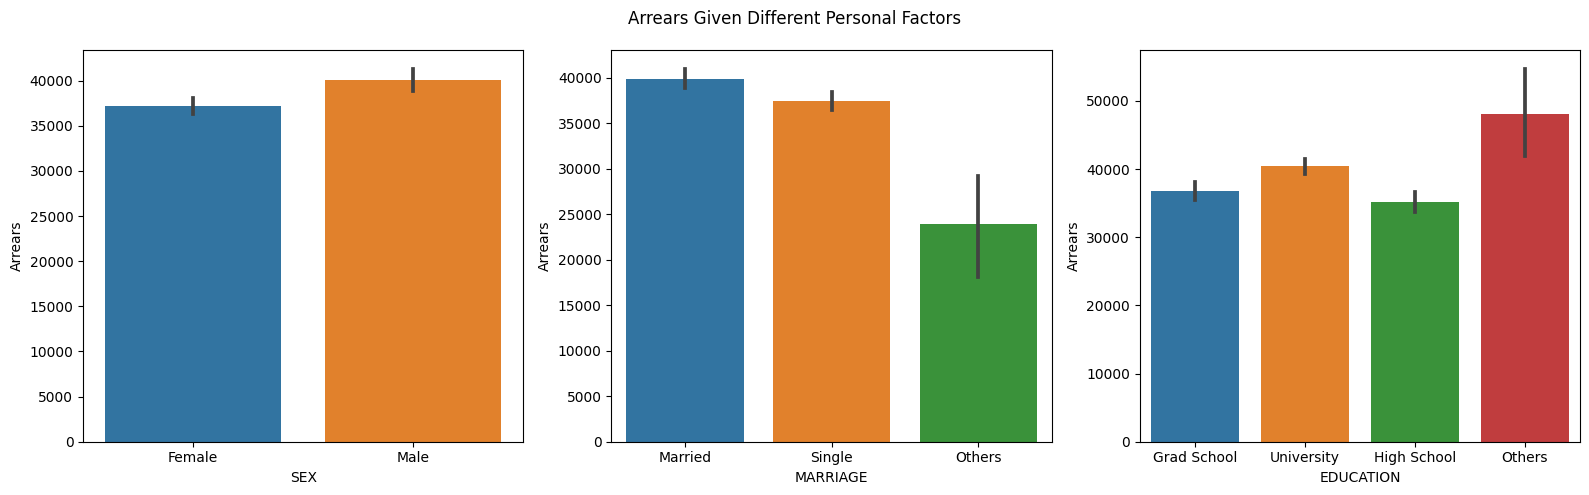

In [31]:
personal_factors = ['SEX', 'MARRIAGE', 'EDUCATION']
fig, axs = plt.subplots(figsize=(16,5), nrows=1, ncols=3)
for i, personal_factor in zip(range(1,5), personal_factors):
  plt.subplot(1,3,i)
  sns.barplot(data=train_set, x=train_set[personal_factor], y='Arrears')
  plt.xlabel(personal_factor)
  plt.ylabel('Arrears')
plt.suptitle('Arrears Given Different Personal Factors')
fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.show()

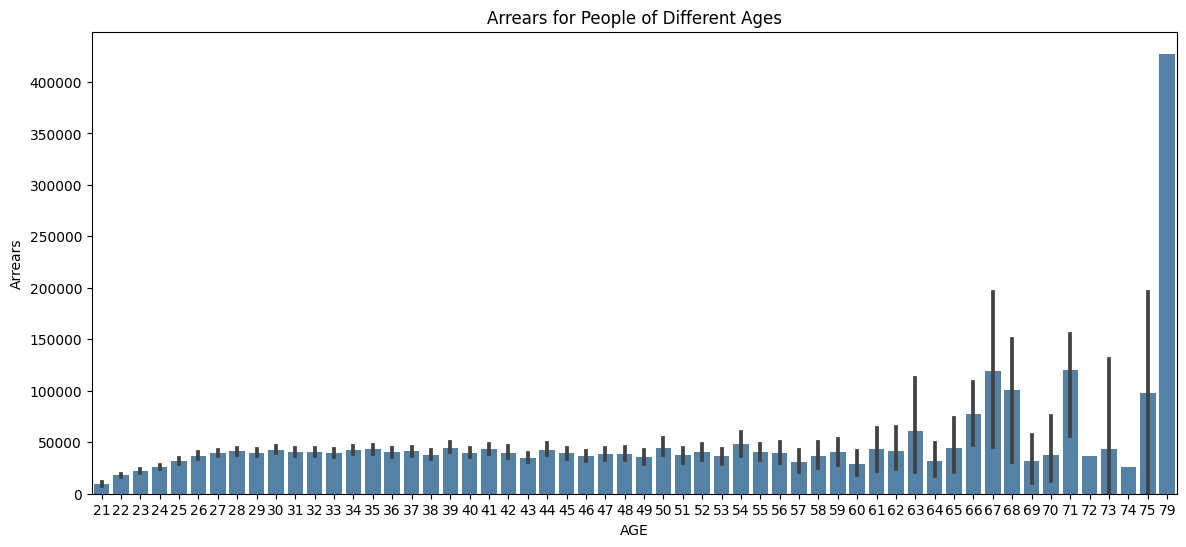

In [32]:
fig, axs = plt.subplots(figsize=(14,6))
sns.barplot(data=train_set, x='AGE', y='Arrears', color='steelblue')
plt.ylabel('Arrears')
plt.title('Arrears for People of Different Ages')
plt.show()

insights from the graphs:

* Male clients have a higher arrears on average.
* Single clients have the least amount of arrears on averange.
* Clients who have are high school graduates have accumulated less arrears compared to other people with a different educational background. University graduates and high school graduates have approximately the same arrears.
* Arrears seam to be uniform across different age groups with only a significant increase for people beyond the age of 67 but this comes with a huge variance in values.

**Analysis of Credit Default and Personal Factors**

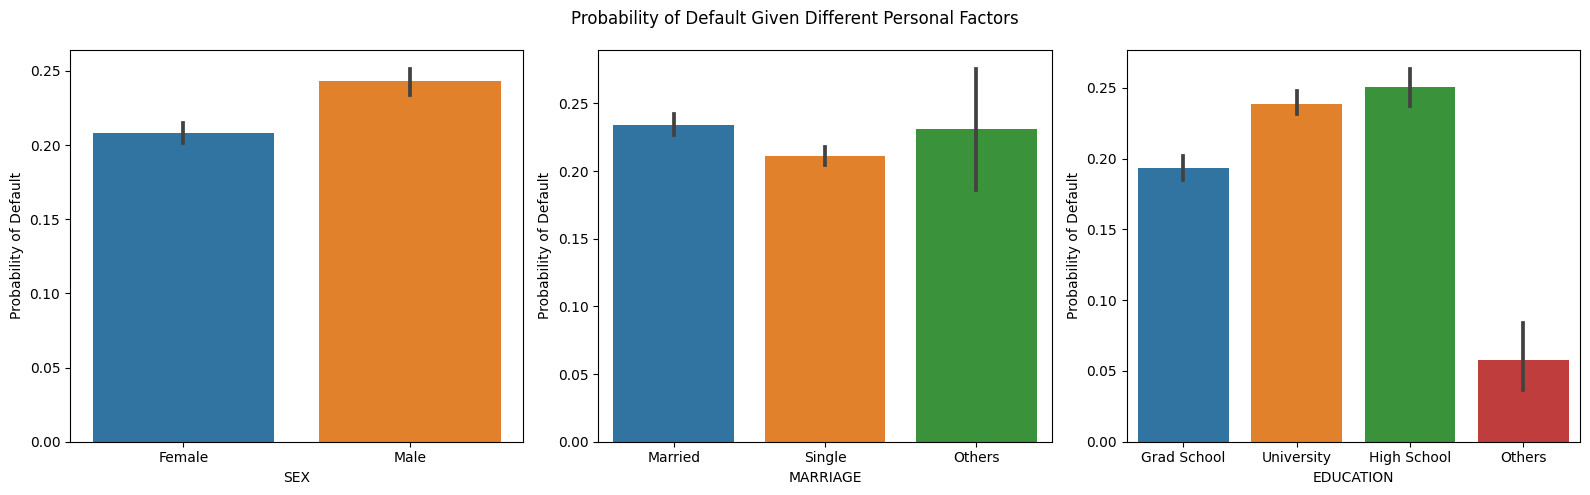

In [33]:
personal_factors = ['SEX', 'MARRIAGE', 'EDUCATION']
fig, axs = plt.subplots(figsize=(16,5), nrows=1, ncols=3)
for i, personal_factor in zip(range(1,5), personal_factors):
  plt.subplot(1,3,i)
  sns.barplot(data=train_set, x=train_set[personal_factor], y='default')
  plt.xlabel(personal_factor)
  plt.ylabel('Probability of Default')
plt.suptitle('Probability of Default Given Different Personal Factors')
fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.show()

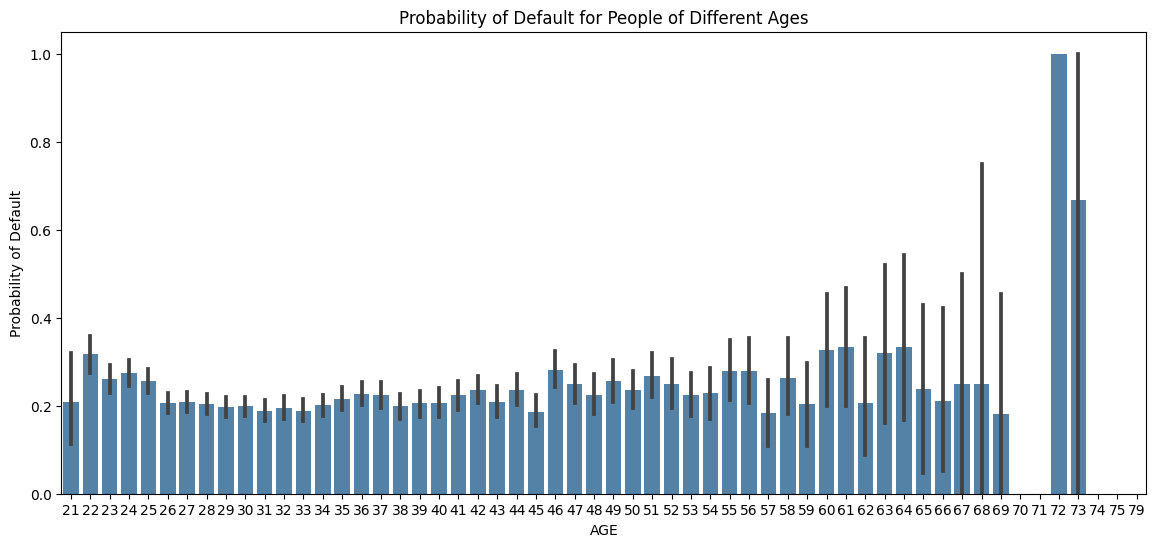

In [34]:
fig, axs = plt.subplots(figsize=(14,6))
sns.barplot(data=train_set, x='AGE', y='default', color='steelblue')
plt.ylabel('Probability of Default')
plt.title('Probability of Default for People of Different Ages')
plt.show()

Insights from the Graphs:

* Males have a slightly higher probability of defaulting on his credit card.
* Marrier clients have the highest probability of default compared to other marital status but the difference is very small.
* Clients who did not have a traditional educational background have the least probability for default. This may be due to the limited data collected from this sector as they also comprise the least number of instances in the dataset.
* The probability of defaulting does not seem to vary across different age groups from 20-60 years old as the number stays between 0.3-0.4 with a steadily increasing variance as the age increases. The probability significantly increases from this point onwards but the variance in the data points to many complicating factors that may shift the probability upwards or downwards.

**Analysis of Credit Default and Historical Bank Transactions**

In [35]:
bank_trans = ['LIMIT_BAL', 'PAY_1', 'Arrears', 'Overlimit', 'PAY_AMT1']

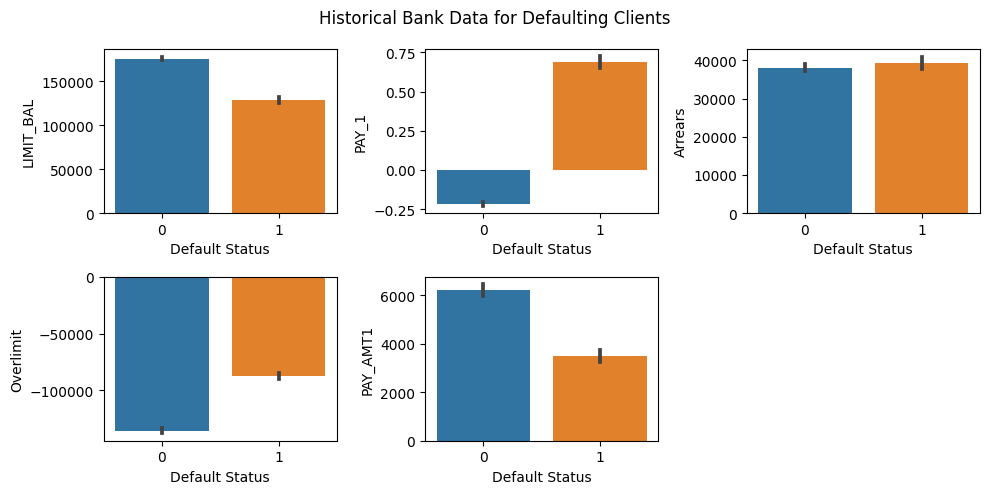

In [36]:
fig, axs = plt.subplots(figsize=(10,5), nrows=2, ncols=3)
for i,col in zip(range(1,6), bank_trans):
  plt.subplot(2,3,i)
  sns.barplot(data=train_set, x='default', y=train_set[col])
  plt.xlabel('Default Status')
fig.delaxes(axs[1][2])
plt.suptitle('Historical Bank Data for Defaulting Clients')
fig.tight_layout()
fig.subplots_adjust(top=.90)
plt.show()

Insights from the graphs:

* People with a lower credit limit is more likely to default in their payment.
* Clients who defaulted in their payment have a history of delayed payments.
* Defaulting and non defaulting clients have the same average arrears.
* A negative overlimit means that a client spends less than their credit limit. As seen in the graph, non defaulting clients have a more negative overlimit compared to clients who have defaulted in their payments.
* Defaulting clients have on average have a lower payment statement compared to non defaulting clients.

# Data Preprocessing <a name='dp'></a>

In this section we will process the dateset into a format that will be suitable for the machine learning models that we will be testing. The preprocessing will involve the following steps:

1. Encoding of Numerical Variables - Machine learning algorithms typically work with numerical data, so categorical variables need to be encoded into a numerical form
2. Balancing the Data - Imbalanced datasets occur when the number of instances in different classes is significantly different. This can bias the model towards the majority class, leading to poor performance in detecting the minority class. For our porject the dataset will be balanced using SMOTE which creates synthetic samples for oversampling.
3. Scaling - the range of values for the different features typically vary greatly. This might lead the machine to think that one feature has a greater influence than the other. In order to prevent this, we will be scaling the values so that they do not skew the models unnecessarily.


In [37]:
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

Numerical attributes and categorical attributes are transformed differently so we have to split our training set into these two.

In [38]:
num_attribs = [num for num in x_train.select_dtypes(['float', 'int']).columns]
cat_attribs = [cat for cat in x_train.select_dtypes('object').columns]

In [39]:
pipeline = ColumnTransformer([
    ('num', StandardScaler(), num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)
])

In [40]:
x_train_final = pipeline.fit_transform(x_train)

# Model Selection <a name='ms'></a>

For this section we will go through sevaral common machine learning models and inspect their performance on our training set by using cross validation method.

Cross-validation is an important technique in machine learning for model evaluation and selection. It helps in assessing the performance and generalization ability of a machine learning model on unseen data without touching our testing set

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict

In [42]:
rf_model = RandomForestClassifier(random_state=42)
log_model = LogisticRegression(solver='lbfgs', max_iter=1000)
knn_model = KNeighborsClassifier()

In [43]:
#create a dict that contains the models and model names

model_dict= {'Random Forest': rf_model, 'Logistic Regression': log_model,
             'K Nearest Neighbors': knn_model}

In [44]:
for model in model_dict:
  model_pred = cross_val_predict(model_dict[model], x_train_final, y_train, cv=5)
  print(model, ' Classification Report \n')
  print(classification_report(model_pred, y_train))

Random Forest  Classification Report 

              precision    recall  f1-score   support

           0       0.94      0.84      0.89     20744
           1       0.38      0.65      0.48      3122

    accuracy                           0.82     23866
   macro avg       0.66      0.75      0.69     23866
weighted avg       0.87      0.82      0.84     23866

Logistic Regression  Classification Report 

              precision    recall  f1-score   support

           0       0.97      0.82      0.89     21992
           1       0.25      0.72      0.38      1874

    accuracy                           0.81     23866
   macro avg       0.61      0.77      0.63     23866
weighted avg       0.92      0.81      0.85     23866

K Nearest Neighbors  Classification Report 

              precision    recall  f1-score   support

           0       0.92      0.83      0.87     20456
           1       0.36      0.56      0.44      3410

    accuracy                           0.80     23866

In [45]:
#make a function that creates ROC Curves

def ROC_graph(model, x,y,cv=1, model_name='none'):
  from sklearn.metrics import roc_curve

  model_prob = cross_val_predict(model,x,y,cv=cv, method='predict_proba')
  model_score = model_prob[:,1]
  fpr, tpr, thresholds = roc_curve(y, model_score)
  return plt.plot(fpr, tpr, label = model_name)

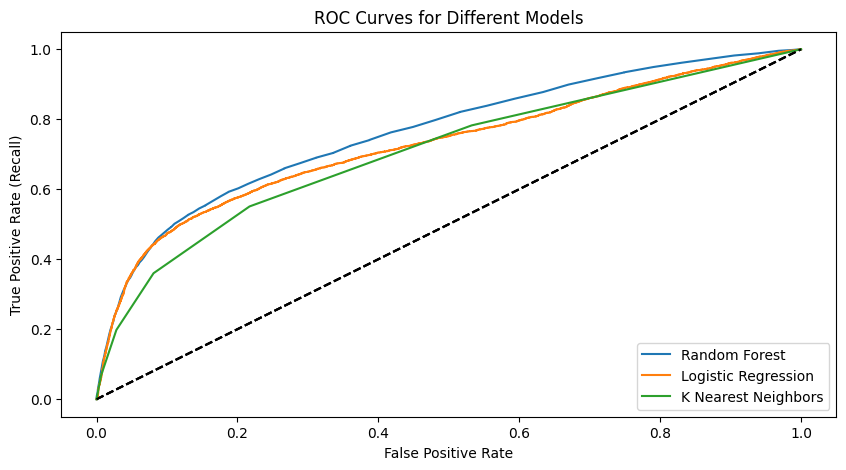

In [46]:
#construct the roc curves

fig, axs = plt.subplots(figsize=(10,5))
for model in model_dict:
  ROC_graph(model_dict[model], x_train_final,
            y_train, cv=5, model_name=model)
  plt.plot([0,1],[0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.legend(loc='lower right')
plt.title('ROC Curves for Different Models')
plt.show()

Insights from the graph:

* The Random Forest Classifier performs the best among the models tested. We will now use this as our basis and perform hypertuning of the parameters to optimize the results.

# Hyperparameter Tuning <a name='ht'></a>

From the previous section, we were able to determine the current best performing model. Typically the performance of a model can still be increased by fine tuning its parameters and finding the optimal values.

These parameters control aspects of the learning algorithm's behavior and can significantly impact the performance and generalization ability of the model.

In order to save time and resources we are going to employ randomized search cross validation or RandomizedSearchCV to perform the hyperparameter tuning. RandomizedSearchCV is a technique for hyperparameter tuning in machine learning. It is a variant of cross-validation (CV) that randomly samples hyperparameter combinations from a predefined search space, instead of exhaustively trying every possible combination like in grid search.

In [47]:
from sklearn.model_selection import RandomizedSearchCV

In [88]:
params = [
    {'n_estimators': [400, 600, 800], 'max_features':[8,16]},
    {'bootstrap': [False], 'n_estimators': [400, 600, 800], 'max_features': [8, 16]}
]

In [89]:
rand_search = RandomizedSearchCV(rf_model, params,
                                 scoring='accuracy', cv=5,
                                 return_train_score=True)

In [ ]:
rand_search.fit(x_train_final, y_train)

In [84]:
#check what the values are for the best parameters

rand_search.best_params_

{'n_estimators': 400, 'max_features': 8}

In [85]:
final_model = rand_search.best_estimator_

# Model Deployment <a name='md'></a>

In [53]:
#transform the testing set

x_test_final = pipeline.fit_transform(x_test)

In [86]:
final_pred = final_model.predict(x_test_final)

In [87]:
print(classification_report(final_pred, y_test))

              precision    recall  f1-score   support

           0       0.95      0.83      0.89      5297
           1       0.33      0.65      0.44       670

    accuracy                           0.81      5967
   macro avg       0.64      0.74      0.66      5967
weighted avg       0.88      0.81      0.84      5967



# Further Optimization Procedures <a name='fop'></a>

The random forest classifier that we used in the previous section is an example of an ensemble method. Ensemble methods are techniques that combine the predictions of multiple individual models to create a more robust and accurate prediction. These often outperform single models by leveraging the diversity and collective wisdom of the individual models.

In this section we will explore the possibility of getting a better classifier by using other ensemble methods such as voting classifier, ADA Boosting, and XGBoost.

**Voting Classifier**

Voting combines the predictions of multiple models by majority voting or weighted voting.

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

In [57]:
rf_model = RandomForestClassifier()
log_model = LogisticRegression()
svm_model = SVC(probability=True)

In [58]:
voting = VotingClassifier(
    estimators= [('log', log_model), ('rf', rf_model), ('svc', svm_model)],
    voting='soft'
)

In [59]:
for model in [rf_model, log_model, svm_model, voting]:
  model.fit(x_train_final, y_train)
  pred = model.predict(x_test_final)
  print('Classification Report for ', model)
  print(classification_report(pred, y_test))

Classification Report for  RandomForestClassifier()
              precision    recall  f1-score   support

           0       0.95      0.83      0.89      5288
           1       0.33      0.64      0.44       679

    accuracy                           0.81      5967
   macro avg       0.64      0.74      0.66      5967
weighted avg       0.88      0.81      0.83      5967

Classification Report for  LogisticRegression()
              precision    recall  f1-score   support

           0       0.97      0.82      0.89      5484
           1       0.25      0.69      0.37       483

    accuracy                           0.81      5967
   macro avg       0.61      0.75      0.63      5967
weighted avg       0.91      0.81      0.85      5967

Classification Report for  SVC(probability=True)
              precision    recall  f1-score   support

           0       0.95      0.83      0.89      5303
           1       0.33      0.65      0.43       664

    accuracy                     

**ADA Boosting Decision Trees**

Boosting is an iterative ensemble technique that trains models sequentially, with each subsequent model trying to correct the mistakes made by the previous models. The models are trained on modified versions of the training data, where more weight is given to the misclassified examples.

In [67]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [69]:
ada_model = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=300,
    algorithm='SAMME.R', learning_rate=0.5
)

ada_model.fit(x_train_final, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=300)

In [70]:
pred = ada_model.predict(x_test_final)

In [71]:
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       0.95      0.83      0.89      5291
           1       0.33      0.64      0.43       676

    accuracy                           0.81      5967
   macro avg       0.64      0.74      0.66      5967
weighted avg       0.88      0.81      0.83      5967



**XGBoost**

In [77]:
import xgboost

In [79]:
xgb = xgboost.XGBClassifier()
xgb.fit(x_train_final, y_train)
pred = xgb.predict(x_test_final)

In [80]:
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       0.94      0.83      0.88      5261
           1       0.33      0.62      0.43       706

    accuracy                           0.81      5967
   macro avg       0.64      0.72      0.66      5967
weighted avg       0.87      0.81      0.83      5967



#Neural Networks <a name='nn'></a>

In [60]:
from tensorflow import keras
import tensorflow as tf

**Neural Network using Sequential**

In [72]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = x_train_final.shape[1:]),
    keras.layers.Dense(500, activation = 'relu'),
    keras.layers.Dense(300, activation = 'relu'),
    keras.layers.Dense(100, activation = 'sigmoid'),
    keras.layers.Dense(1, activation = 'sigmoid')
])

In [73]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'sgd',
    metrics=['accuracy']
)

In [74]:
history = model.fit(x_train_final, y_train, epochs= 30, validation_split = 0.2)

Epoch 1/30
597/597 [==============================] - 3s 4ms/step - loss: 0.5135 - accuracy: 0.7737 - val_loss: 0.4947 - val_accuracy: 0.7769
Epoch 2/30
597/597 [==============================] - 2s 3ms/step - loss: 0.4757 - accuracy: 0.7916 - val_loss: 0.4680 - val_accuracy: 0.7964
Epoch 3/30
597/597 [==============================] - 2s 3ms/step - loss: 0.4610 - accuracy: 0.8038 - val_loss: 0.4577 - val_accuracy: 0.8056
Epoch 4/30
597/597 [==============================] - 2s 4ms/step - loss: 0.4544 - accuracy: 0.8080 - val_loss: 0.4562 - val_accuracy: 0.8119
Epoch 5/30
597/597 [==============================] - 2s 3ms/step - loss: 0.4503 - accuracy: 0.8105 - val_loss: 0.4493 - val_accuracy: 0.8113
Epoch 6/30
597/597 [==============================] - 2s 3ms/step - loss: 0.4466 - accuracy: 0.8120 - val_loss: 0.4477 - val_accuracy: 0.8119
Epoch 7/30
597/597 [==============================] - 2s 3ms/step - loss: 0.4440 - accuracy: 0.8131 - val_loss: 0.4457 - val_accuracy: 0.8127
Epoch 

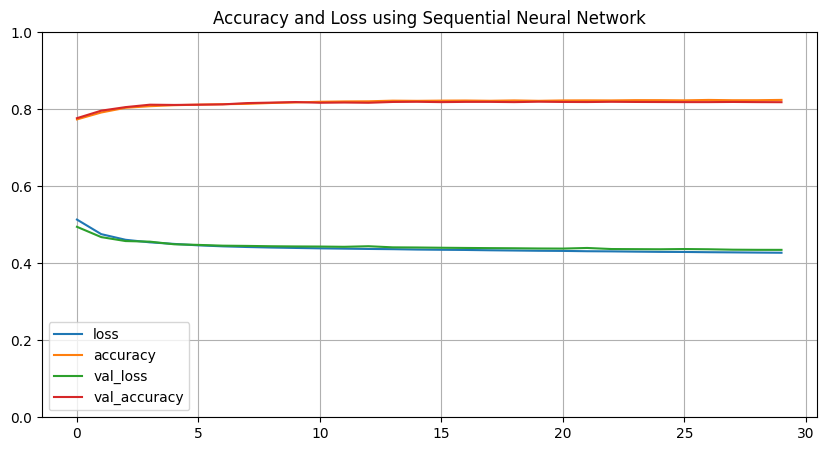

In [75]:
pd.DataFrame(history.history).plot(figsize= (10,5))
plt.grid(True)
plt.ylim(0,1),
plt.title('Accuracy and Loss using Sequential Neural Network')
plt.show()

In [76]:
model.evaluate(x_test_final, y_test)

187/187 [==============================] - 0s 2ms/step - loss: 0.4441 - accuracy: 0.8123


[0.4440651535987854, 0.812300980091095]

#Conclusion

This machine learning project successfully developed and evaluated credit default prediction models using several machine learning models such as Random Forest, SVM, Logistic Regression, Voting Classifier, ADA Boosting, XGBoosting, as well as Neural Networks. The Random Forest classifier showcased strong performance and interpretability, while the Neural Network model demonstrated its ability to capture complex patterns. Both models have the potential to be valuable tools in assisting financial institutions in predicting credit defaults. Further experimentation, refinement, and deployment of these models could lead to improved credit risk management and decision-making processes.

